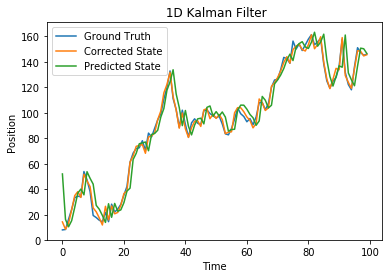

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
#Define System
X = 0;
dt = 1;
u = 2; # speed/control = 2m/s2
n = np.random.randn();
v = np.random.randn();

#Kalman Filter variables

x = 50;      #state vector
A = 1;    #state transition matrix
B = 1;    #control input matrix 
P = 100;    #std_dev*std_dev = 10*10 
Q = 100;      #process noise covariance matrix 
R = 9;       #measurement noise covariance matrix
H = 1;

# Storing calculated values in these vectors for plotting
s=(1,100)
XX = np.zeros(s);
tt = np.zeros(s);
xx_predicted = np.zeros(s);
xx = np.zeros(s);
PP = np.zeros(s);
yy = np.zeros(s);
t=0
for t in range(100):
   #simulating the System
    n = math.sqrt(Q) * np.random.randn(); #random noise
    X = X + u*dt + n; # New Current State
    v = math.sqrt(R) * np.random.randn() ;
    y = H*X + v; # Measurements
    
     #Prediction Step
    x_predicted = A*x + B*u;         #predicting the new state (mean)
    P = A * P * np.transpose(A) + Q;    #predicting the new uncertainity (covariance)

   #Correction Step
    e = H*x_predicted;        #expectation: predicted measurement from the o/p
    
    E = H*P*np.transpose(H);     #Covariance of ^ expectation
    
    z = y - e;      #innovation: diff between the expectation and real sensor measurement
    Z = R + E;      #Covariance of ^ - sum of uncertainities of expectation and real measurement
   
    K = P*np.transpose(H) * math.pow(Z,-1);
    
    x = x_predicted + K*z; #final corrected state
    P = P - K * H* P;       #uncertainity in corrected state
    
   #Saving the outputs
    
    xx_predicted[0][t] = x_predicted;
    xx[0][t] = x;
    PP[0][t] = P;
    XX[0][t] = X;
    tt[0][t] = t;
    yy[0][t] = y;
    plt.figure(1)
    plt.xlabel('Time')
    plt.ylabel('Position')
   # print t
   
plt.plot(tt[0],XX[0],label="Ground Truth")    
plt.plot(tt[0],xx[0],label="Corrected State")
plt.plot(tt[0],xx_predicted[0],label="Predicted State")
plt.title(' 1D Kalman Filter')
plt.legend()
plt.show()

   